# Лабораторная №2

# Понижение размерности пространства признаков

## Загрузка данных

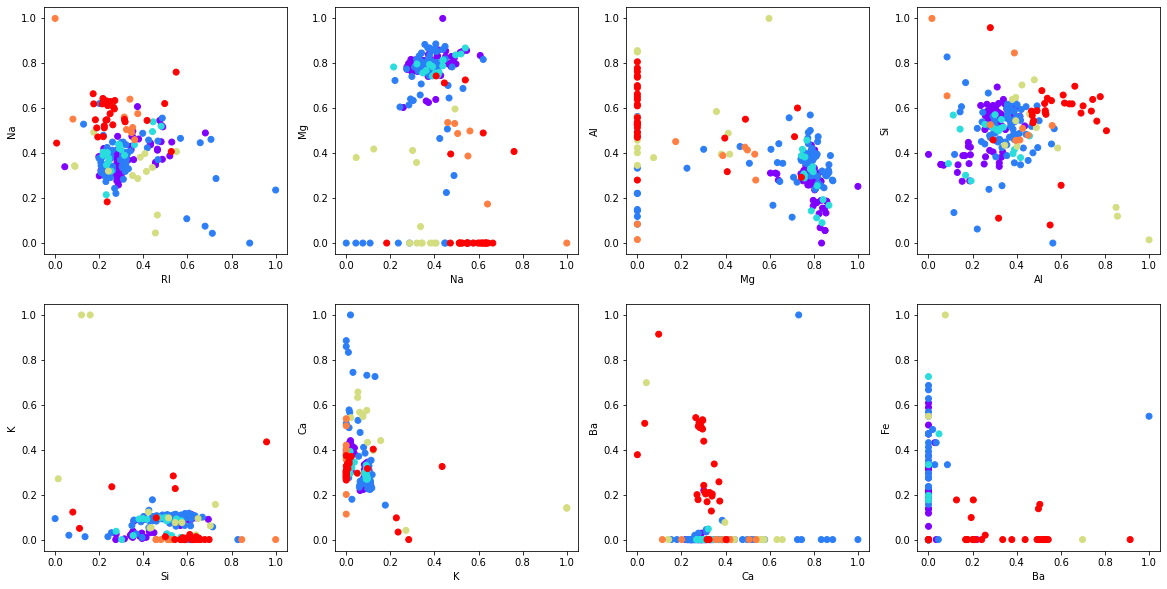

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 10)

df = pd.read_csv('glass.csv')

var_names = list(df.columns) # Получение имен признаков

labels = df.to_numpy('int')[:,-1] # Метки классов
data = df.to_numpy('float')[:,:-1] # Описательные признаки

data = preprocessing.minmax_scale(data)

fig, axs = plt.subplots(2,4)

for i in range(data.shape[1]-1):
    axs[i // 4, i % 4].scatter(data[:,i],data[:,(i+1)],c=labels,cmap='rainbow')

    axs[i // 4, i % 4].set_xlabel(var_names[i])
    axs[i // 4, i % 4].set_ylabel(var_names[i+1])

plt.show()

Вместо `hsv` была выбрана палитра `rainbow`, чтобы красный и розовый цвета не сливались. 

Для определения цветов воспользуемся той же функцией, но построим scatter-plot в по label'ам

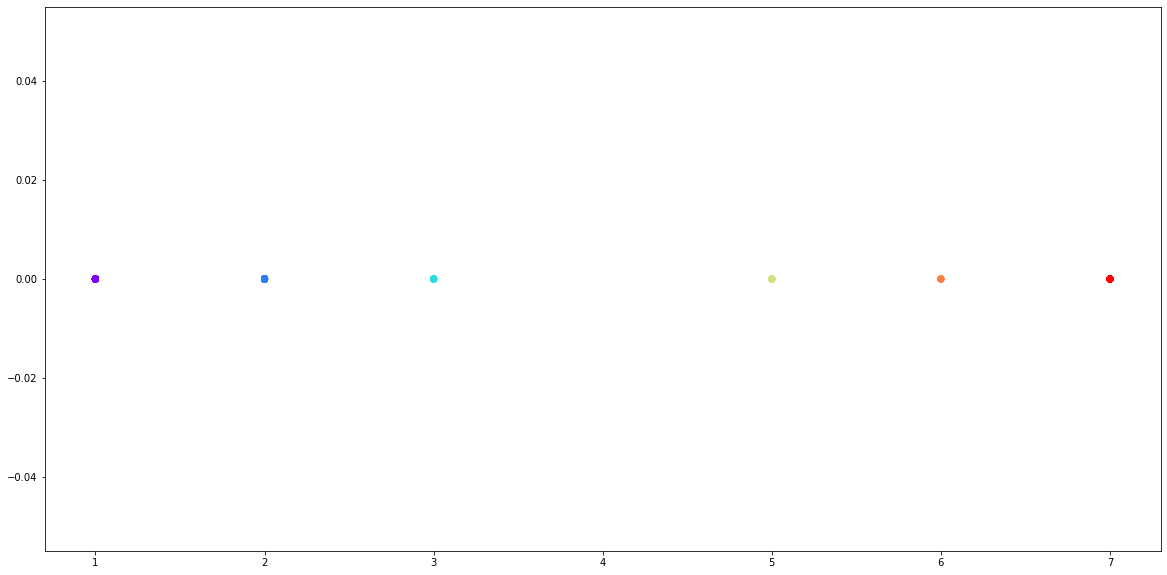

In [2]:
plt.scatter(labels, [0]*len(labels), c=labels, cmap='rainbow')

plt.show()

Итого цвета:

| Цвет | Номер типа | Тип |
| --- | --- | --- |
| Фиолетовый | 1 | buildingwindowsfloatprocessed  |
| Синий | 2 | buildingwindowsnonfloatprocessed |
| Бирюзовый | 3 | vehiclewindowsfloatprocessed |
| Бежевый | 5 | containers |
| Оранжевый | 6 | tableware |
| Красный | 7 | headlamps |

## Метод главных компонент

Воспользуемтся методом главных компонент для понижения пространства признаков и выделим наиболее важные 2 компоненты в данных:

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca_data = pca.fit(data).transform(data)

print(pca.explained_variance_ratio_)

[0.45429569 0.17990097]


Собственные числа для компонент получились следующими:

In [4]:
print(pca.singular_values_)

[5.1049308  3.21245688]


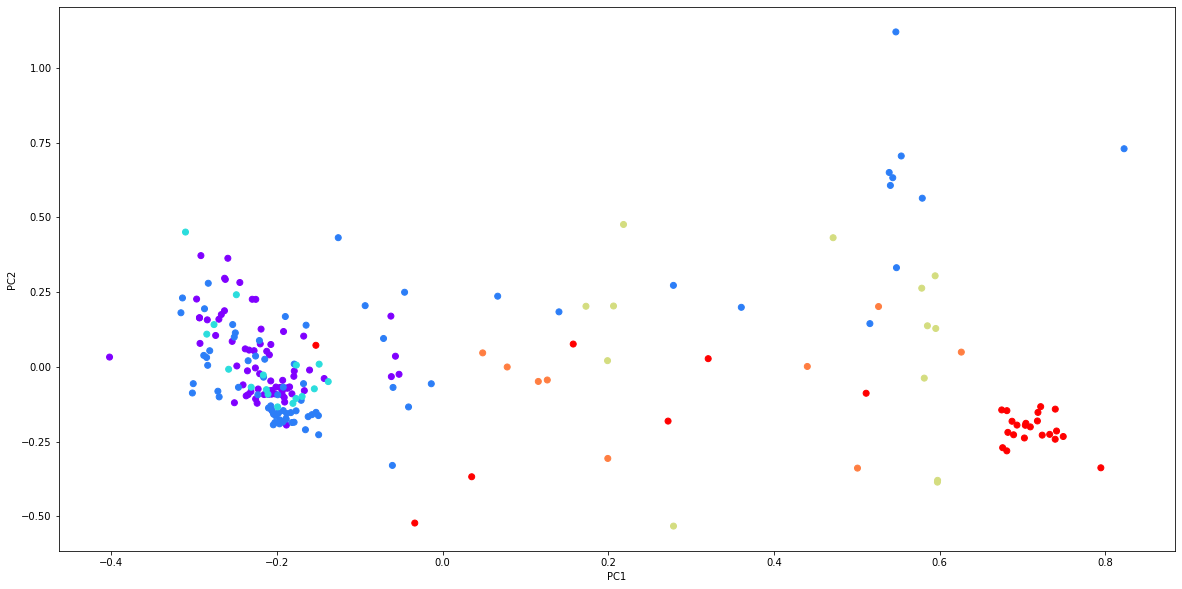

In [5]:
fig, axs = plt.subplots(1,1)

axs.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='rainbow')
axs.set_xlabel('PC1')
axs.set_ylabel('PC2')

plt.show()

Обнаружена скученность данных headlapms (красные точки, тип 7) в правой части графика. Компоненты, до которых мы понизили пространство - PC1 и PC2. Это означает, что для headlapms более важной составляющей является PC1, чем PC2. Для типов же 1, 2, 3 PC1 не является важным компонентом.

In [6]:
pca = PCA(n_components = 4)

pca_data = pca.fit(data).transform(data)

expl_var_ratio = pca.explained_variance_ratio_

expl_var_sum = np.sum(expl_var_ratio)

print(expl_var_sum)

0.8586697305102718


При 4 компонентах достигается объяснение 85% дисперсии и более.

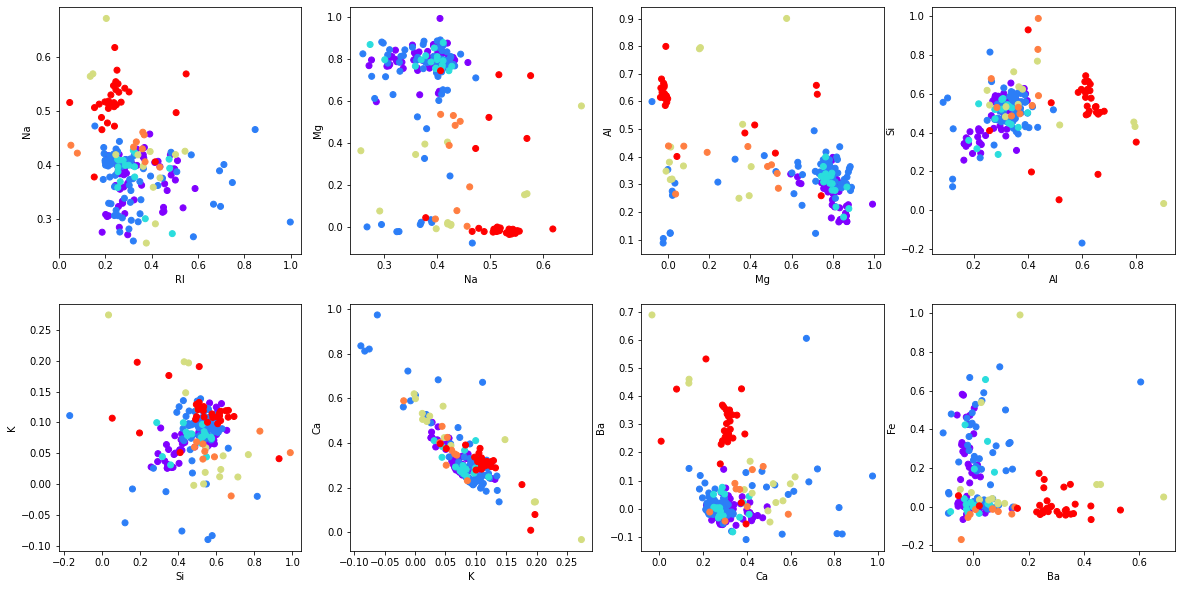

In [7]:
pca_data_inv = pca.inverse_transform(pca_data)

fig, axs = plt.subplots(2,4)

for i in range(data.shape[1]-1):
    axs[i // 4, i % 4].scatter(pca_data_inv[:,i],pca_data_inv[:,(i+1)],c=labels,cmap='rainbow')

    axs[i // 4, i % 4].set_xlabel(var_names[i])
    axs[i // 4, i % 4].set_ylabel(var_names[i+1])

plt.show()

Данные похожи на первоначальные, но не полностью, так как при инверсии мы не учитывали компоненты, которые ответственны за 15% дисперсии. В следствие этого и образуется разница.

[0.45429569 0.17990097]
[5.1049308  3.21245688]


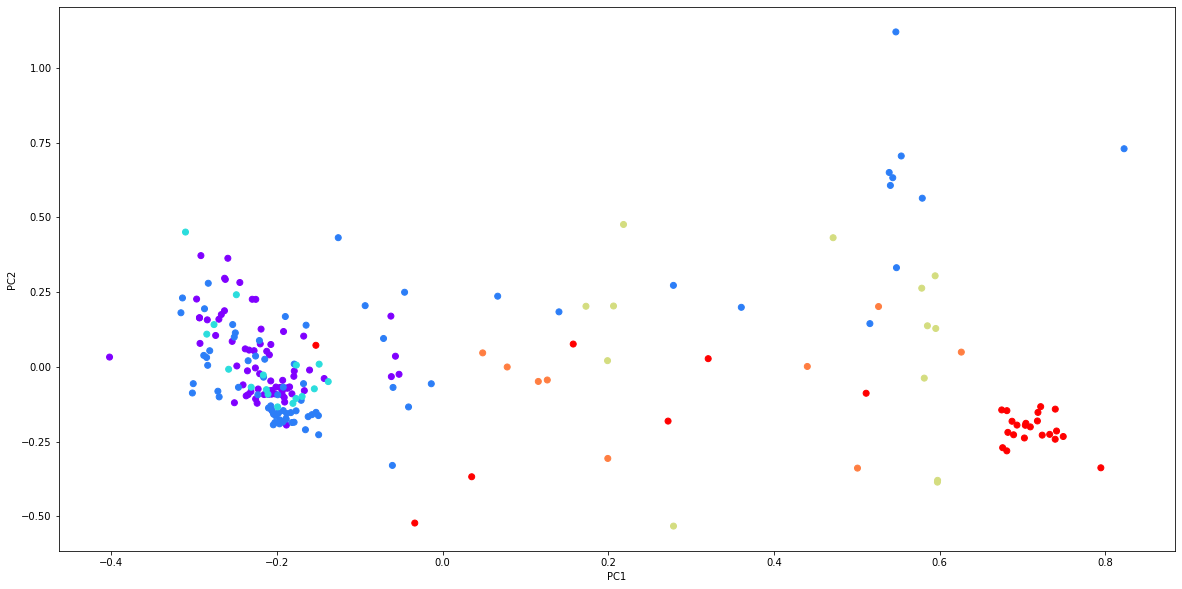

[0.45429569 0.17990097]
[5.1049308  3.21245688]


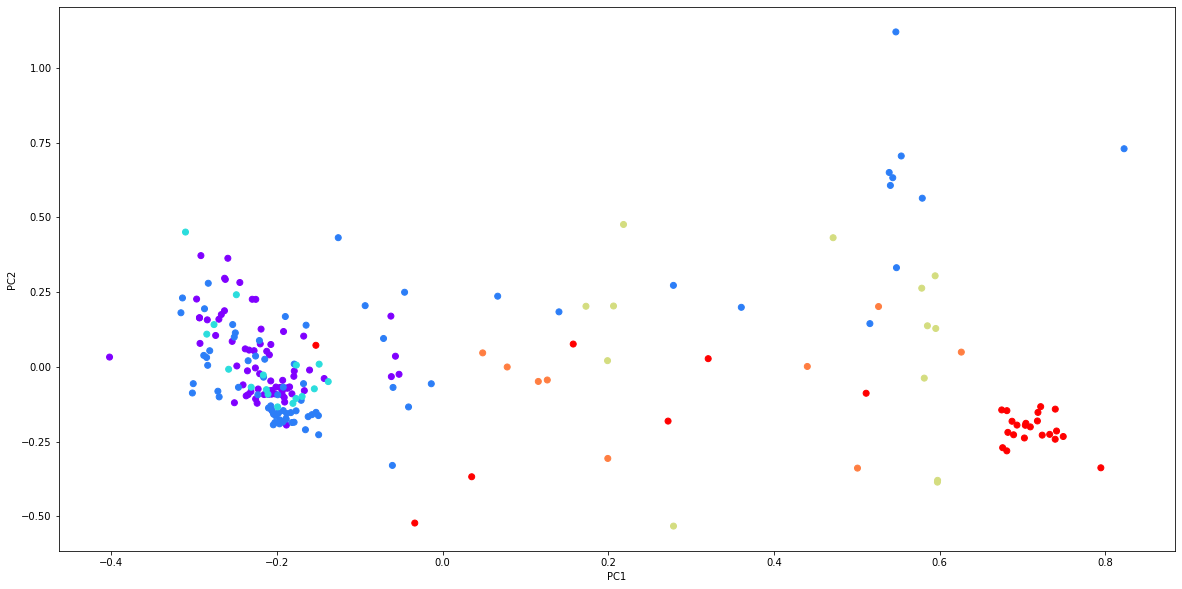

[0.45429569 0.17990097]
[5.1049308  3.21245688]


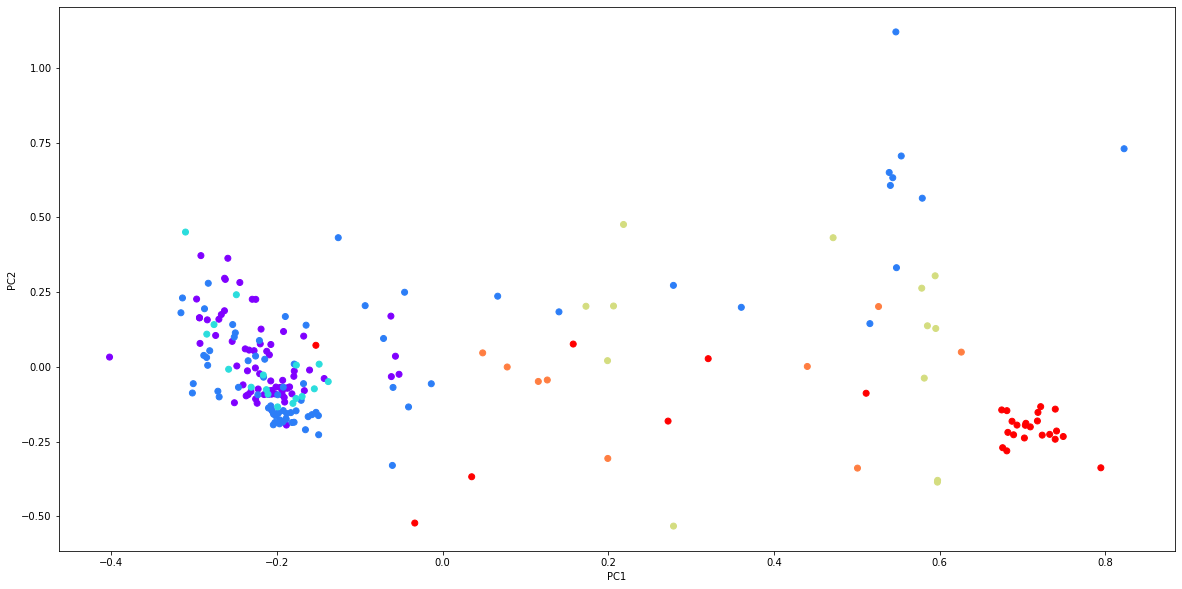

In [8]:
def run_pca(svd_solver='auto'):
    pca = PCA(n_components = 2, svd_solver=svd_solver)

    pca_data = pca.fit(data).transform(data)

    print(pca.explained_variance_ratio_)
    print(pca.singular_values_)
    
    fig, axs = plt.subplots(1,1)

    axs.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='rainbow')
    axs.set_xlabel('PC1')
    axs.set_ylabel('PC2')

    plt.show()

run_pca('full')
run_pca('arpack')
run_pca('randomized')


Разницы в результатах замечено не было. Возможна разница в скорости вычислений, так как параметр svd_solver отвечает за метод SVD (Single Value Decomposition).

## Модификации метода главных компонент

## Kernel PCA

Kernel PCA позволяет делать нелинейные преобразования над данными в отличие от PCA.

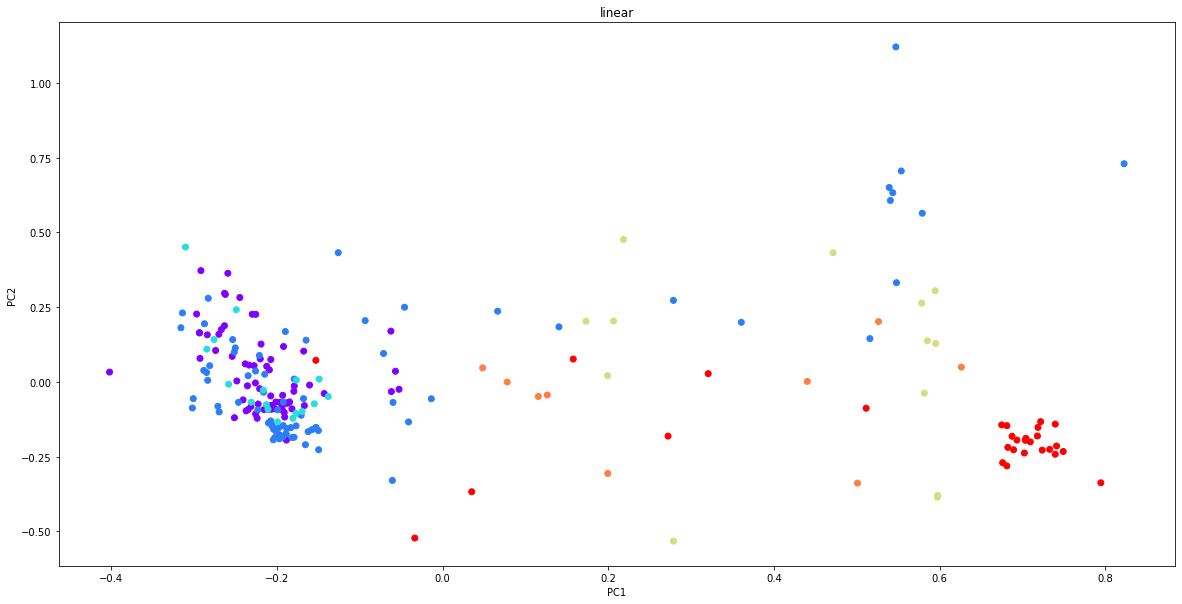

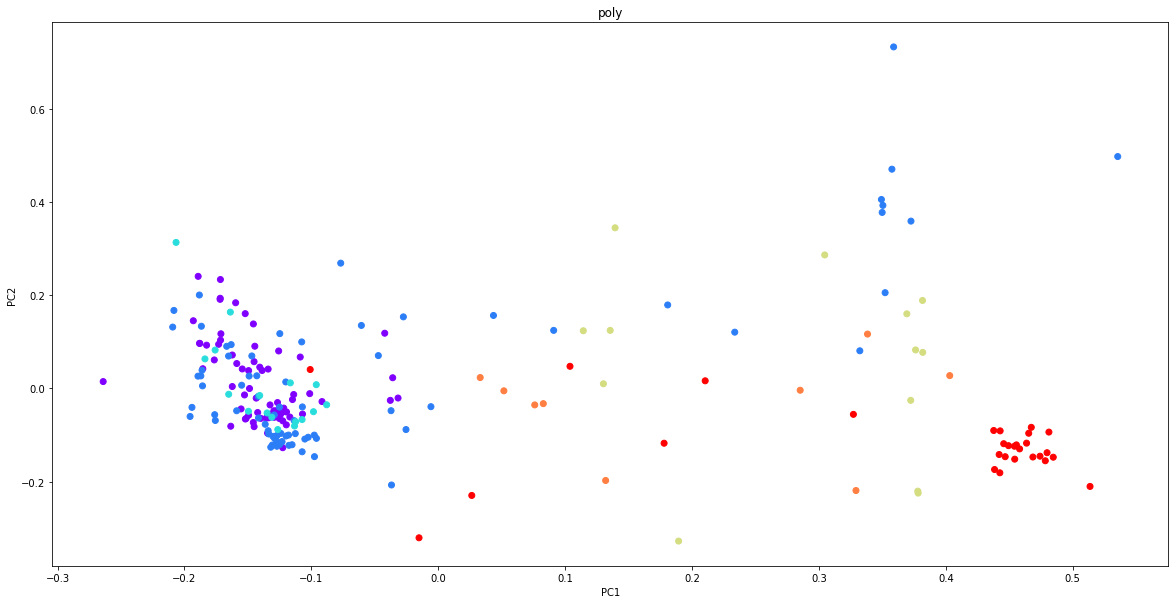

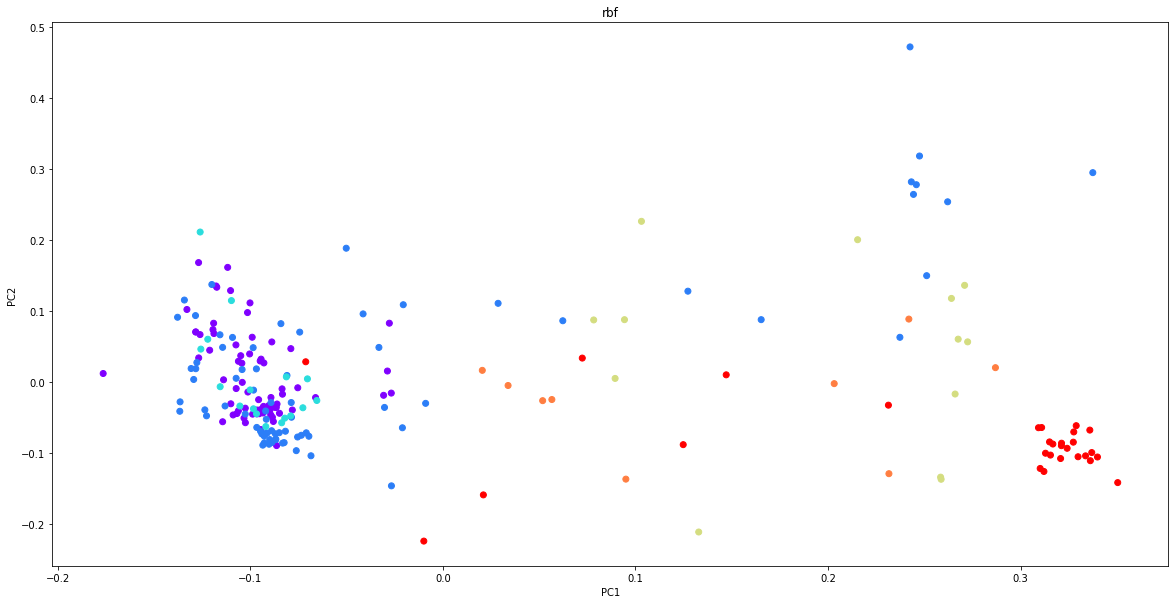

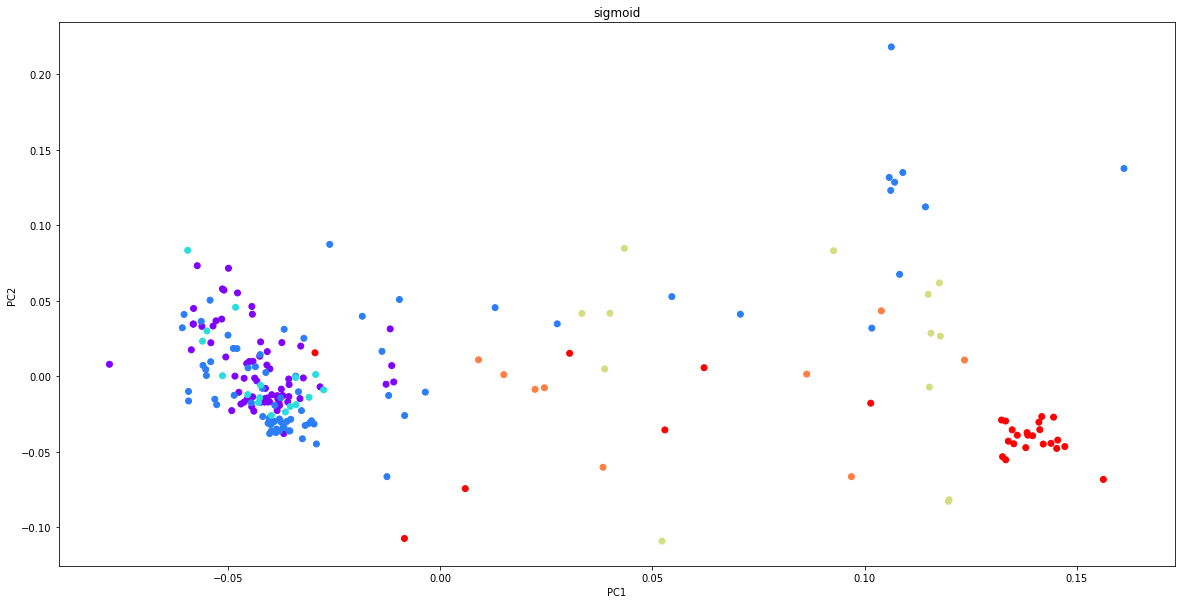

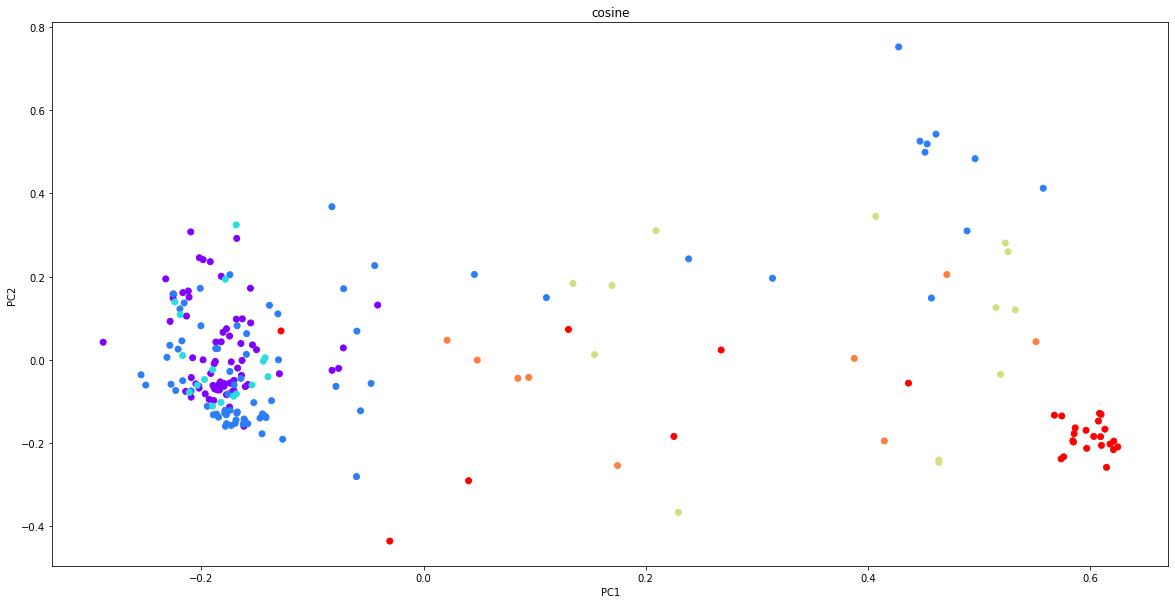

In [9]:
from sklearn.decomposition import KernelPCA

def kpca_run(kernel='linear'):
    pca = KernelPCA(n_components = 2, kernel=kernel)

    pca_data = pca.fit(data).transform(data)
    
    fig, axs = plt.subplots(1,1)

    axs.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='rainbow')
    axs.set_xlabel('PC1')
    axs.set_ylabel('PC2')
    axs.set_title(kernel)

    plt.show()


kpca_run('linear')
kpca_run('poly')
kpca_run('rbf')
kpca_run('sigmoid')
kpca_run('cosine')

Поскольку обычный PCA является линейным преобразованием, то логично, что результаты с линейным ядром в Kernel PCA совпадают с результатами обычного PCA.

## Sparce PCA

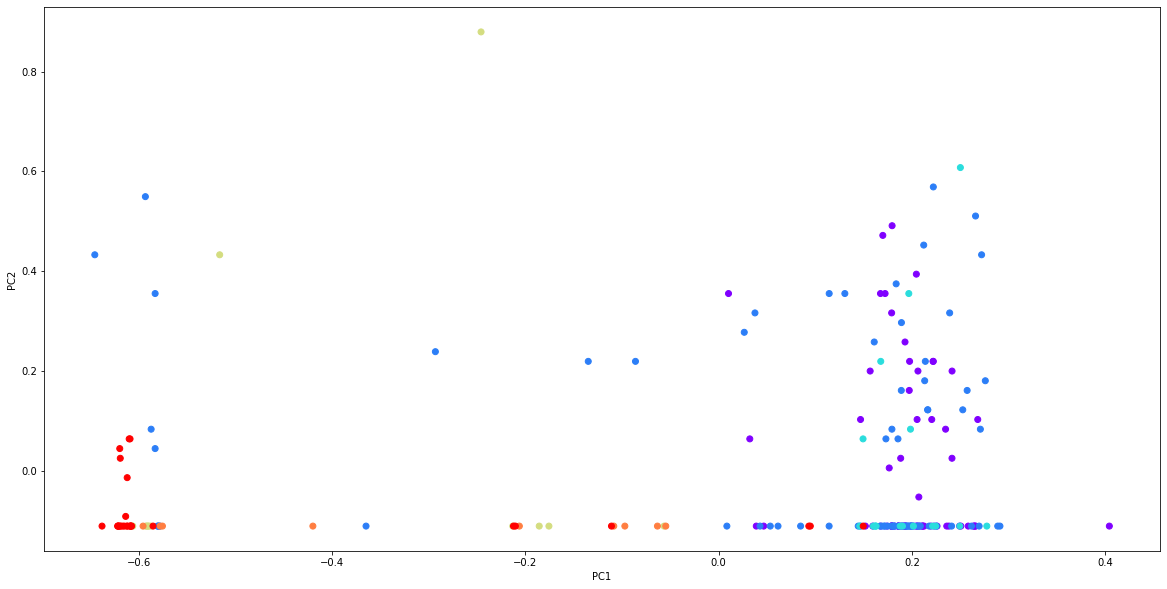

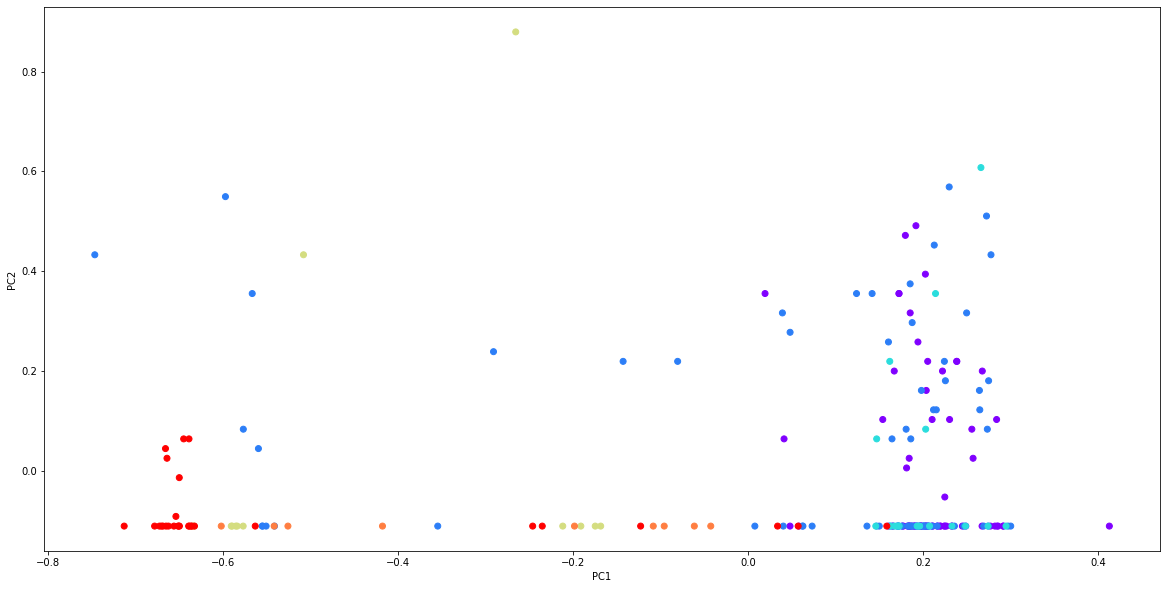

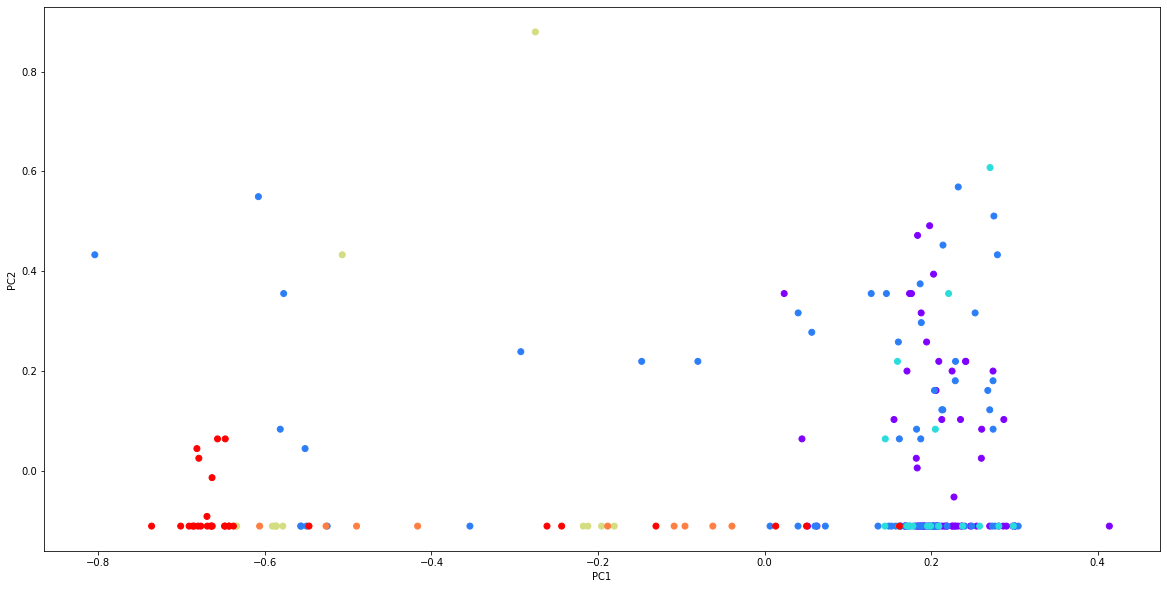

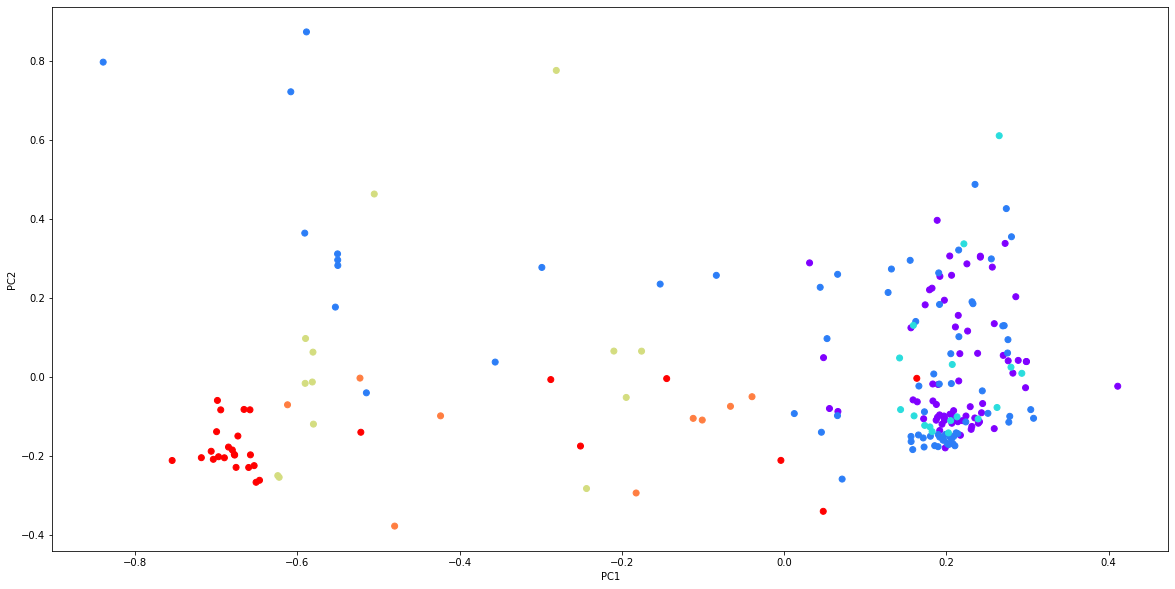

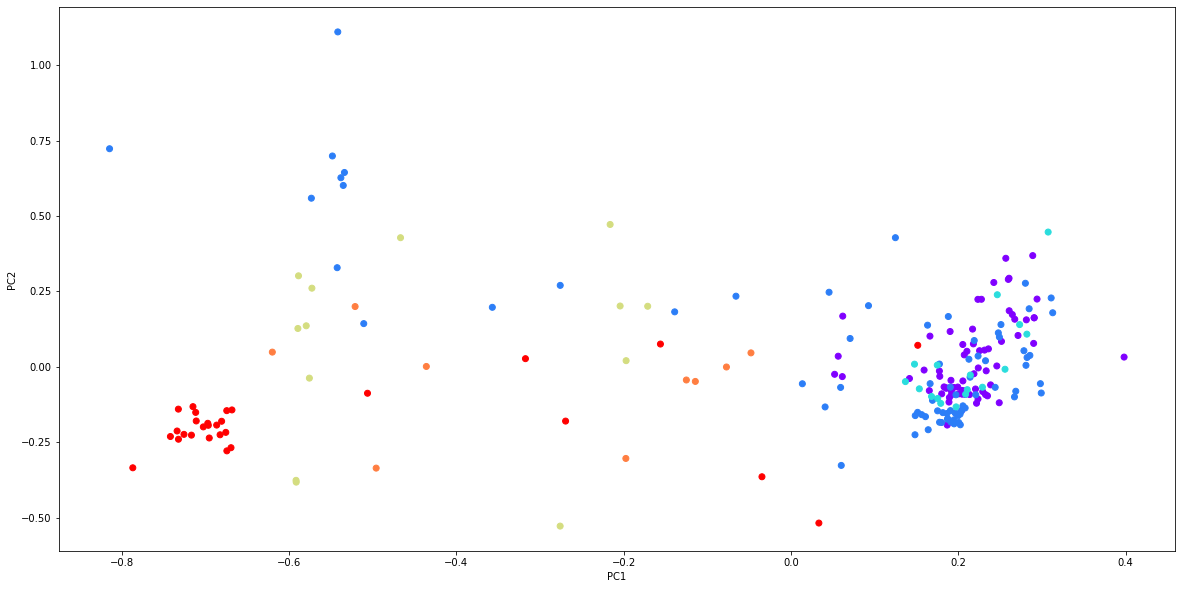

In [10]:
from sklearn.decomposition import SparsePCA

def spca_run(alpha=1):
    pca = SparsePCA(n_components = 2, alpha=alpha)

    pca_data = pca.fit(data).transform(data)
    
    fig, axs = plt.subplots(1,1)

    axs.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='rainbow')
    axs.set_xlabel('PC1')
    axs.set_ylabel('PC2')

    plt.show()


spca_run(1)
spca_run(0.7)
spca_run(0.5)
spca_run(0.3)
spca_run(0.0)

Параметр alpha контролирует разреженность, поэтому при понижении его до 0 мы приближаемся к результату, который похож на результат отбычного PCA

## Факторный анализ

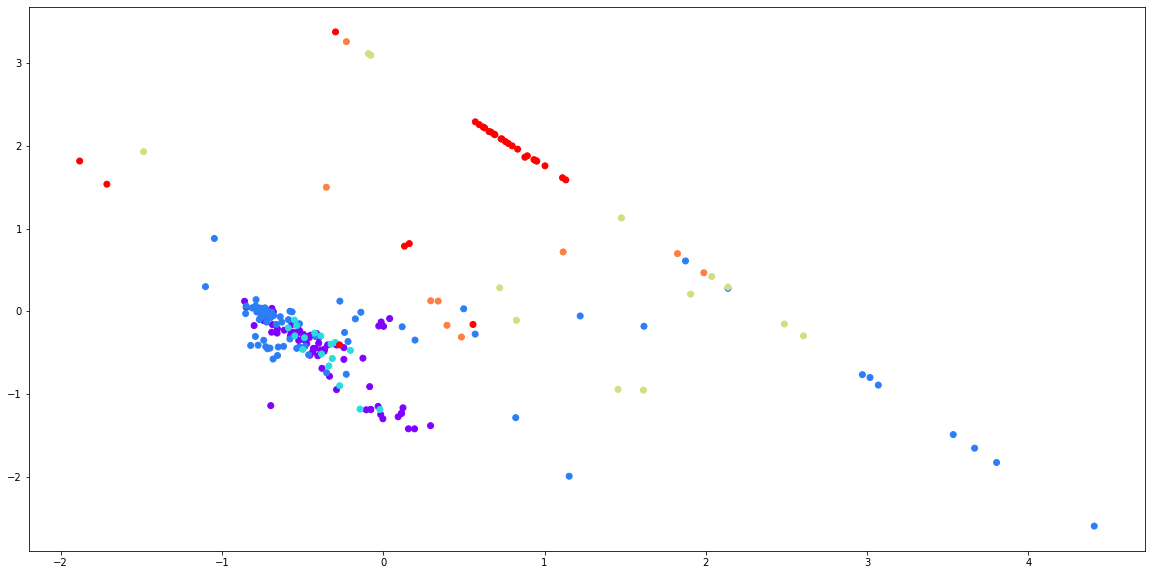

In [11]:
from sklearn.decomposition import FactorAnalysis

def fa_run(tol=0.01):
    pca = FactorAnalysis(n_components = 2, tol=tol)

    pca_data = pca.fit(data).transform(data)
    
    fig, axs = plt.subplots(1,1)

    axs.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='rainbow')

    plt.show()
    
fa_run(0.01)

Из диаграммы видны две компоненнты, с отрицательной корреляцией, а также некоторая скученность для красного, синего и фиолетового классов. Однако скученность наблюдается лучше с использованием PCA.

FA в отличие от корреляции фокусируется на выделении двух "скрытых" признаков, а PCA - на понижении степени пространства таким образом, чтобы сохранить реперезентативность.